# Basic object detection - Introduction
This is the fifth and last part of my [dezeenAI](https://github.com/adamsiemaszkiewicz/dezeenAI) project meant to build an object and colour detection search engine based on the [Dezeen.com](http://dezeen.com/)'s Interior category.

This notebook builds a custom object detection system based on [YOLOv4](https://github.com/AlexeyAB/darknet) and [Open Images Dataset v6](https://storage.googleapis.com/openimages/web/index.html) to suplement the out-of-the-box model we used in the previous notebook.

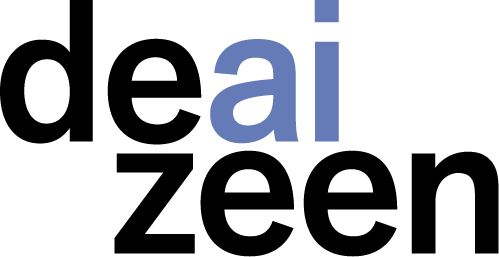

# Environment setup

## Google Drive mount
I'm using Google Colaboratory as my default platform, therefore I need to set up my environment to integrate it with Google Drive. You can skip this bit if you're working locally.

1. Mount Google Drive on the runtime to be able to read and write files. This will ask you to log in to your Google Account and provide an authorization code.
2. Create a symbolic link to a working directory 
3. Change the directory to the one where I cloned my repository.


In [1]:
# mount Google Drive on the runtime
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# create a symbolic link to a working directory
!ln -s /content/gdrive/My\ Drive/Colab\ Notebooks/dezeenAI /mydrive

# navigate to the working directory
%cd /mydrive

/content/gdrive/My Drive/Colab Notebooks/dezeenAI


## Libraries & functions
- `sys` - system-specific parameters and functions
- `os.path` - common pathname manipulations
- `timeit` - cell runtime

In [3]:
import sys
import os.path
import timeit

# Open Images Dataset v6
Let's download some more data from [Open Images Dataset v6](https://storage.googleapis.com/openimages/web/index.html) to train our custom model. To do so let's use [OIDv4 ToolKit](https://github.com/theAIGuysCode/OIDv4_ToolKit).

## Categories
1. Create a list of Open Images categories to download
2. Create a string of collapsed category names for later use as a command parameter. The parameter needs to be a string of space separated classnames. In case of multi-word class names spaces need to be replaced with a dash.
3. Export category list to a txt file with each class in a new line.

In [5]:
# list of classes to download
classes = [
           'Stairs',
           'Cabinetry',
           'Desk',
           'Studio couch',
           'Couch',
           'Door',
           'Shower',
           'Wardrobe',
           'Nightstand',
           'Bathtub',
           'Curtain',
           'Fireplace',
           'Bookcase',
           'Chest of drawers',
           'Cupboard',
           'Coffee table',
           'Window',
           'Closet',
           'Lamp',
           'Drawer',
           'Stool'
           ]

# collapse the list of classes
classes_dashed = ' '.join([cls.replace(' ', '_') for cls in classes])
classes_dashed

'Stairs Cabinetry Desk Studio_couch Couch Door Shower Wardrobe Nightstand Bathtub Curtain Fireplace Bookcase Chest_of_drawers Cupboard Coffee_table Window Closet Lamp Drawer Stool'

In [6]:
# navigate to the toolking directory
%cd /mydrive/OIDv4_ToolKit/

# save the classes to a txt file
with open('classes.txt', 'w') as output:
    output.write('\n'.join(classes))

/content/gdrive/My Drive/Colab Notebooks/dezeenAI/OIDv4_ToolKit


## OIDv4_ToolKit
Let's use the [OIDv4_ToolKit](https://github.com/theAIGuysCode/OIDv4_ToolKit) repository to download the image files from the Open Image Dataset

In [7]:
# %cd /mydrive
# !git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git

## Install the library requirements
Let's install the library requirements essential for the toolkit to work properly.

In [8]:
!pip install -r /mydrive/OIDv4_ToolKit/requirements.txt

     |████████████████████████████████| 3.5MB 5.6MB/s 
     |████████████████████████████████| 552kB 41.5MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 7.2MB 26.1MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: botocore 1.19.43 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.
  Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16
  Found existing installation: rsa 4.6
    Uninstalling rsa-4.6:
      Successfully uninstalled rsa-4.6


## Download training & validation sets
Let's use OIDv4_ToolKit's `main.py downloader` script to download the image files train and validation sets in the 5:1 ratio.
- `--classes` followed by previously created collapsed string of category names points to the image classes we want to download
- `--type_csv` followed by `train` on `validation` indicates which dataset type we want to download
- `--limit` followed by an integer indicates the maximum of files we want to download
- `--multiclasses` followed by `1` or `0` indicates if we're deadling with a single- or a multiclass classification problem

### Training set

In [12]:
# start the timer and print the information
start = timeit.default_timer()
print('\nStarting. This might take around an hour to complete...\n')

!python3 main.py downloader --classes {classes_dashed} --type_csv train --limit 1000 --multiclasses 1

# stop the timer and print runtime duration
stop = timeit.default_timer() 
print('Runtime: {} seconds.'.format(int(stop-start)))


Starting. This might take around an hour to complete...


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Stairs', 'Cabinetry', 'Desk', 'Studio couch', 'Couch', 'Door', 'Shower', 'Wardrobe', 'Nightstand', 'Bathtub', 'Curtain', 'Fireplace', 'B

### Validation set

In [10]:
# start the timer and print the information
start = timeit.default_timer()
print('\nStarting. This might take around an quarter to complete...\n')

!python3 main.py downloader --classes {classes_dashed} --type_csv validation --limit 200 --multiclasses 1

# stop the timer and print runtime duration
stop = timeit.default_timer() 
print('Runtime: {} seconds.'.format(int(stop-start)))


Starting. This might take around an quarter to complete...


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Stairs', 'Cabinetry', 'Desk', 'Studio couch', 'Couch', 'Door', 'Shower', 'Wardrobe', 'Nightstand', 'Bathtub', 'Curtain', 'Fireplace',

## Convert annotations
Let's use out-of-the-box `convert_annotations.py` script to convert OID annotations to the proper YOLOv4 format. The text files are generated in folder with images.

In [ ]:
!python3 convert_annotations.py

Currently in subdirectory: train
Converting annotations for class:  Sink_Stairs_Chair_Cabinetry_Desk_Studio couch_Couch_Door_Shower_Wardrobe_Nightstand_Bathtub_Houseplant_Sofa bed_Curtain_Bed_Fireplace_Bookcase_Table_Mirror_Chest of drawers_Cupboard_Coffee table_Toilet_Bench_Window_Closet_Lamp_Drawer_Stool
100% 11995/11995 [1:46:23<00:00,  1.88it/s]
Currently in subdirectory: validation_old
Converting annotations for class:  Sink_Stairs_Chair_Cabinetry_Desk_Studio couch_Couch_Door_Shower_Wardrobe_Nightstand_Bathtub_Houseplant_Sofa bed_Curtain_Bed_Fireplace_Bookcase_Table_Mirror_Chest of drawers_Cupboard_Coffee table_Toilet_Bench_Window_Closet_Lamp_Drawer_Stool
100% 710/710 [06:11<00:00,  1.91it/s]
Currently in subdirectory: validation_old2
Converting annotations for class:  Sink_Stairs_Chair_Cabinetry_Desk_Studio couch_Couch_Door_Shower_Wardrobe_Nightstand_Bathtub_Houseplant_Sofa bed_Curtain_Bed_Fireplace_Bookcase_Table_Mirror_Chest of drawers_Cupboard_Coffee table_Toilet_Bench_Window_

## Move datasets
Let's move the downloaded datasets to our data folder.

In [ ]:
# %mkdir -p /mydrive/data/oid
# %mv OID/Dataset/train/ /mydrive/data/oid
# %mv OID/Dataset/validation/ /mydrive/data/oid

# Custom model
Let's now build a custom object detection model based on the downloaded Open Images Dataset using YOLOv4.

https://github.com/AlexeyAB/darknet#how-to-train-to-detect-your-custom-objects

## Architecture configuration

Copy the original configuration file and perform a find-and-replace on it based on our new dataset.

- `WIDTH` & `HEIGHT` - network size as a value multiple of 32 (typically 416)
- `NUMBER_OF_CLASSES` - number of classes to train
- `MAX_BATCHES` - maximum number of samples to be propagated through the network equal `NUMBER_OF_CLASSES * 2000`
- `STEPS` - 80% & 90% of `MAX_BATCHES` in each of the `[yolo]` layers
- `FILTERS` - `3*(NUMBER_OF_CLASSES + 5)` in each of the `[convolutional]` layer before `[yolo]` layers




In [ ]:
# navigate to files folder
%cd /mydrive/files/

# copy the original config file as a base for our custom configuration
!cp /mydrive/darknet/cfg/yolov4-custom.cfg /mydrive/files/yolov4-test.cfg

# calculate values to use
WIDTH = 416
HEIGHT = 416
NUMBER_OF_CLASSES = len(classes)
MAX_BATCHES = int(NUMBER_OF_CLASSES * 2000)
STEPS = int(0.8*MAX_BATCHES), int(0.9*MAX_BATCHES)
FILTERS = int(3*(NUMBER_OF_CLASSES + 5))

# set up settings dictionary
settings = {
    'WIDTH':             f's/width=608/width={WIDTH}/',
    'HEIGHT':            f's/height=608/height={HEIGHT}/',
    'NUMBER_OF_CLASSES': f's/classes=80/classes={NUMBER_OF_CLASSES}/',
    'MAX_BATCHES':       f's/max_batches\ =\ 500500/max_batches={MAX_BATCHES}/', # not less than 6000
    'STEPS':             f's/steps=400000,450000/steps={STEPS[0]},{STEPS[1]}/',
    'FILTERS':           f's/filters=255/filters={FILTERS}/'
    }

# replace the values in the file using settings dictionary
for value in settings.values():
  !sed -i {value} yolov4-test.cfg

/content/gdrive/My Drive/Colab Notebooks/dezeenAI/files


## Object names
Create a new file `obj.names` with names of the classes (one per line).

***Note:*** *If a class name has more than one word you need to replace spaces with underscore*


In [ ]:
with open('/mydrive/files/obj.names', 'w') as output:
    output.write('\n'.join([cls.replace(' ', '_') for cls in classes]))

## Datasets file lists
Create a list of files for both train and validation sets.

In [ ]:
for set_type in ['train', 'validation']:

  # initiate a filename container
  image_files = []
  
  # navigate to a directory
  folder_name = '_'.join(classes)
  DIR = f'/mydrive/OIDv4_ToolKit/OID/Dataset/{set_type}/{folder_name}/'
  os.chdir(DIR)
  
  # find and list image files in the directory
  for filename in os.listdir(os.getcwd()):
    if filename.endswith('.jpg'):
      image_files.append(DIR + filename)
    
  # save filenames to a txt file (one per line)
  with open(f'/mydrive/files/{set_type}.txt', 'w') as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write('\n')
    outfile.close()

##  Data configuration
Create a new file `obj.data` to put together data info.
- `classes` - number of classes to train
- `train` - list of files in the train dataset
- `valid` - list of files in the validation dataset
- `names` - list of classes' names
- `backup` - a directory to store partial and final weights

In [ ]:
number_of_classes = len(classes)

with open('/mydrive/files/obj.data', 'w') as output:
    output.write(
        f'''classes = {number_of_classes}
        train = /mydrive/files/train.txt
        valid = /mydrive/files/validation.txt
        names = /mydrive/files/obj.names
        backup = /mydrive/data/'''
    )

# Custom detector

## Download pre-trained weights

In [ ]:
%cd /mydrive/files/
!wget -nc https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

/content/gdrive/My Drive/Colab Notebooks/dezeenAI/files


## Train the model

- `obj.data`: number and names of classes, list of train/val images, backup directory
- `yolov4-obj.cfg`: neural network architecture configuration
- `yolov4-obj_last.weights`: latest weights file
- `-dont_show`: suppress the display of an image
- `-map`:


In [ ]:
# move to the files directory
%cd /mydrive/files/

# make sure the permissions are ok
!chmod +x /mydrive/darknet/darknet

# run training from scratch
!/mydrive/darknet/darknet detector train obj.data yolov4-obj.cfg yolov4.conv.137 -dont_show -map

# run training with latest weights
# !/mydrive/darknet/darknet detector train obj.data yolov4-obj.cfg yolov4-obj_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.672726, GIOU: 0.637503), Class: 0.991313, Obj: 0.153902, No Obj: 0.000270, .5R: 1.000000, .75R: 0.000000, count: 3, class_loss = 0.704299, iou_loss = 0.442179, total_loss = 1.146478 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.756328, GIOU: 0.739269), Class: 0.898477, Obj: 0.443157, No Obj: 0.002621, .5R: 1.000000, .75R: 0.500000, count: 8, class_loss = 1.152707, iou_loss = 0.383281, total_loss = 1.535988 
 total_bbox = 152236, rewritten_bbox = 0.777083 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.807068, GIOU: 0.804794), Class: 0.967637, Obj: 0.002077, No Obj: 0.000014, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.250287, iou_loss = 6.770397, total_loss = 7.020685 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.698891, GIOU: 0.676555), Class: 0.986740, Obj: 0.172384, No O

In [ ]:
showIMG('chart.png')

NameError: ignored